In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('E:\mining\HOC\KI II NAM 3\DE AN 2')

In [2]:
data=pd.read_csv('Bank_Personal_Loan.csv')

Trường hợp là Ngân hàng có một Dữ liệu khách hàng với các đặc điểm khác nhau của khách hàng. Ban quản lý đã xây dựng một sản phẩm mới - Khoản vay cá nhân và thực hiện một chiến dịch nhỏ nhằm bán Sản phẩm mới cho khách hàng của họ. Sau một thời gian, 9% khách hàng vay tiêu dùng cá nhân từ Ngân hàng.
##### MỤC TIÊU LÀ!
Bán thêm các sản phẩm Vay tiêu dùng cá nhân cho khách hàng của Ngân hàng.
Để đưa ra các chiến dịch nhằm tiếp thị mục tiêu tốt hơn để tăng tỷ lệ thành công với ngân sách tối thiểu.
Để xác định những khách hàng tiềm năng có xác suất mua khoản vay cao hơn

In [3]:
data.head(20)

,ID,Age,Sex,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25.0,A,1,49,91107,4.0,1.6,1.0,0,1,0,0,0,0
1,2,45.0,B,19,34,90089,3.0,1.5,1.0,0,1,0,0,0,0
2,3,39.0,A,15,11,94720,1.0,1.0,NaN,0,0,0,0,0,0
3,4,35.0,A,9,100,94112,1.0,2.7,2.0,0,0,0,0,0,0
4,5,35.0,B,8,45,91330,4.0,1.0,2.0,0,0,0,0,1,0
5,6,37.0,A,13,29,92121,4.0,0.4,2.0,155,0,0,1,0,0
6,7,53.0,B,27,72,91711,2.0,1.5,2.0,0,0,0,1,0,0
7,8,NaN,A,24,22,93943,1.0,0.3,3.0,0,0,0,0,1,0
8,9,35.0,A,10,81,90089,3.0,0.6,2.0,104,0,0,1,0,0
9,10,34.0,B,9,180,93023,1.0,8.9,3.0,0,0,0,0,0,1


### MÔ TẢ SƠ LƯỢC


In [4]:
rows_count, columns_count = data.shape
print ('Dữ liệu Bank gồm: ')
print('Tổng số hàng :', rows_count)
print('Tổng số cột :', columns_count)

Dữ liệu Bank gồm: 
Tổng số hàng : 5000
Tổng số cột : 15


In [5]:
print('Gồm các cột: ',"\n", data.columns)

Gồm các cột:  
 Index(['ID', 'Age', 'Sex', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Personal Loan'],
      dtype='object')


#### Các biến danh nghĩa:
ID - Mã khách hàng

ZIP Code - Địa chỉ nhà Mã ZIP của khách hàng
#### Các biến phân loại thông thường:
Family - Số thành viên trong gia đình của khách hàng

Education - Trình độ học vấn của khách hàng.(khoảng từ 1 đến 3 tương ứng là Dưới Đại học, Cao học và Sau đại học
#### Biến khoảng:
Tuổi - Tuổi của khách hàng

Kinh nghiệm - Số năm kinh nghiệm của khách hàng đã có

Thu nhập - Annula Thu nhập của khách hàng tính bằng đô la

CCAvg - Trung bình chi tiêu trên thẻ tín dụng mỗi tháng bằng đô la

Thế Chấp - Trị Giá Thế Chấp Căn Nhà
#### Biến phân loại nhị phân:
Tài khoản CD - Khách hàng có Tài khoản CD với ngân hàng hay không

Tài Khoản Bảo Mật - Khách hàng có Tài Khoản Bảo Mật với ngân hàng hay không

Online - Khách hàng có tiện ích Online banking với ngân hàng hay không

Thẻ tín dụng - Khách hàng có thẻ tín dụng do Universal Bank phát hành hay không

Khoản vay cá nhân - Đây là biến mục tiêu của chúng tôi mà chúng tôi phải dự đoán

--> Điều này cho biết khách hàng có chấp nhận vay hay không

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 4992 non-null   float64
 2   Sex                 5000 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   int64  
 5   ZIP Code            5000 non-null   int64  
 6   Family              4996 non-null   float64
 7   CCAvg               5000 non-null   float64
 8   Education           4993 non-null   float64
 9   Mortgage            5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  Personal Loan       5000 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 586.1

In [7]:
data.isnull().sum().sum()

19

In [8]:
data.isnull().sum()

ID                    0
Age                   8
Sex                   0
Experience            0
Income                0
ZIP Code              0
Family                4
CCAvg                 0
Education             7
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [9]:
data[pd.isna(data['Age'])]

,ID,Age,Sex,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
7,8,NaN,A,24,22,93943,1.0,0.3,3.0,0,0,0,0,1,0
54,55,NaN,B,5,44,95819,1.0,0.2,3.0,0,0,0,1,0,0
227,228,NaN,B,23,148,94551,2.0,7.5,1.0,0,0,1,1,1,0
247,248,NaN,A,29,120,92626,4.0,2.7,2.0,111,1,1,1,0,1
334,335,NaN,B,23,45,95053,1.0,1.3,2.0,0,0,0,1,0,0
383,384,NaN,B,18,53,94608,1.0,0.2,1.0,0,0,0,1,0,0
681,682,NaN,B,9,164,94720,1.0,6.0,3.0,0,0,0,1,0,1
845,846,NaN,A,17,29,94706,3.0,1.0,2.0,0,0,0,1,1,0


In [10]:
data[pd.isna(data['Family'])]

,ID,Age,Sex,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
14,15,67.0,B,41,112,91741,NaN,2.0,1.0,0,1,0,0,0,0
522,523,36.0,A,11,72,91007,NaN,2.8,1.0,224,0,0,0,0,0
596,597,48.0,A,22,152,94022,NaN,3.5,3.0,0,0,0,1,0,1
651,652,28.0,B,4,58,92121,NaN,1.5,1.0,131,0,0,0,0,0


In [11]:
data[pd.isna(data['Education'])]

,ID,Age,Sex,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
2,3,39.0,A,15,11,94720,1.0,1.0,NaN,0,0,0,0,0,0
17,18,42.0,A,18,81,94305,4.0,2.4,NaN,0,0,0,0,0,0
23,24,44.0,A,18,43,91320,2.0,0.7,NaN,163,1,0,0,0,0
27,28,46.0,B,20,158,90064,1.0,2.4,NaN,0,0,0,1,1,0
109,110,43.0,B,17,49,94542,1.0,2.8,NaN,0,0,0,1,0,0
1963,1964,62.0,A,38,50,94539,2.0,1.1,NaN,0,0,0,0,1,0
2057,2058,37.0,B,12,125,91754,2.0,3.9,NaN,0,0,0,1,1,0


##### Nhận xét: 
- Cột 'Age' có 2 trường hợp có giá trị null --> quyết định điền giá trị trung bình 
- Cột 'Family' có 1 giá trị null            --> điền giá trị chiếm số đông
- Cột 'Education' có 5 giá trị null         --> điền giá trị chiếm số đông 

In [12]:
data['Age'].mean()

45.341145833333336

In [13]:
data['Family'].mode()


0    1.0
Name: Family, dtype: float64

In [14]:
data['Education'].mode()


0    1.0
Name: Education, dtype: float64

In [15]:
data.Age.fillna(data.Age.mean(), inplace = True)
data.Family.fillna(value = data.Family.mode()[0], inplace = True )
data.Education.fillna(value =data.Education.mode()[0], inplace = True )

In [16]:
data.isnull().sum()

ID                    0
Age                   0
Sex                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

##### Kiểm tra có giá trị trùng lặp hay không? 

In [17]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

#### Mô tả dữ liệu

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.341146,11.458895,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396000,1.147801,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


##### Nhận thấy ở cột Experience giá trị min = -3

In [19]:
print(data.groupby([data['Experience'] < 0])['Experience'].count().sort_values(ascending=False))
data[data['Experience'] < 0]['Experience'].value_counts()

Experience
False    4948
True       52
Name: Experience, dtype: int64


-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [27]:
data[data['Experience']<0]

,ID,Age,Sex,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
89,90,25,A,-1,113,94303,4.0,2.30,3.0,0,0,0,0,1,0
226,227,24,A,-1,39,94085,2.0,1.70,2.0,0,0,0,0,0,0
315,316,24,A,-2,51,90630,3.0,0.30,3.0,0,0,0,1,0,0
451,452,28,B,-2,48,94132,2.0,1.75,3.0,89,0,0,1,0,0
524,525,24,B,-1,75,93014,4.0,0.20,1.0,0,0,0,1,0,0
536,537,25,B,-1,43,92173,3.0,2.40,2.0,176,0,0,1,0,0
540,541,25,A,-1,109,94010,4.0,2.30,3.0,314,0,0,1,0,0
576,577,25,A,-1,48,92870,3.0,0.30,3.0,0,0,0,0,1,0
583,584,24,B,-1,38,95045,2.0,1.70,2.0,0,0,0,1,0,0
597,598,24,B,-2,125,92835,2.0,7.20,1.0,0,1,0,0,1,0


In [28]:

data.Experience = data.Experience.replace(-1, 1)
data.Experience = data.Experience.replace(-2, 2)
data.Experience = data.Experience.replace(-3, 1)


In [29]:
data[data['Experience']<0]

,ID,Age,Sex,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan


- Biến ID không thêm bất kỳ thông tin thú vị nào. Không có mối liên hệ nào giữa ID khách hàng của một người và khoản vay, nó cũng không đưa ra bất kỳ kết luận chung nào cho các khách hàng tiềm năng cho khoản vay trong tương lai. Chúng ta có thể bỏ qua thông tin này để dự đoán mô hình của mình.
- Vì biến Age và Experience có mức độ 'tương quan' cao vì thế mà vai trò của 2 biến là như nhau -> có thể xóa 1 trong 2 
- Biến Zip code: mã nơi ở của khách hàng cũng không có mối quan hệ với biến cần dự đoán. --> có thể xóa

<AxesSubplot:>

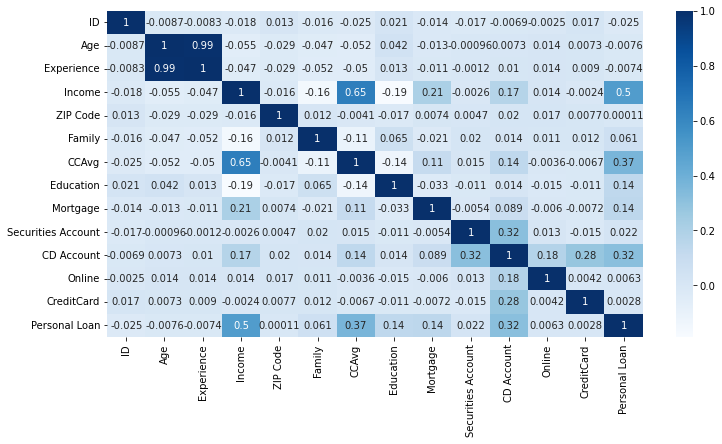

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(), cmap='Blues' , annot = True)

In [21]:
data.drop(['Experience','ID','ZIP Code'], axis =1)

,Age,Sex,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25.0,A,49,4.0,1.6,1.0,0,1,0,0,0,0
1,45.0,B,34,3.0,1.5,1.0,0,1,0,0,0,0
2,39.0,A,11,1.0,1.0,1.0,0,0,0,0,0,0
3,35.0,A,100,1.0,2.7,2.0,0,0,0,0,0,0
4,35.0,B,45,4.0,1.0,2.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,A,40,1.0,1.9,3.0,0,0,0,1,0,0
4996,30.0,B,15,4.0,0.4,1.0,85,0,0,1,0,0
4997,63.0,B,24,2.0,0.3,3.0,0,0,0,0,0,0
4998,65.0,A,49,3.0,0.5,2.0,0,0,0,1,0,0
